### Exercise 6

In [3]:
%matplotlib inline
#%matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

### System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [4]:
def u(x: float, y: float) -> float:
    return x**2 + x*y - 10

def v(x: float, y: float) -> float:
    return y + 3*x*y**2 - 57

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

Text(0.5, 0.92, 'v(x,y)')

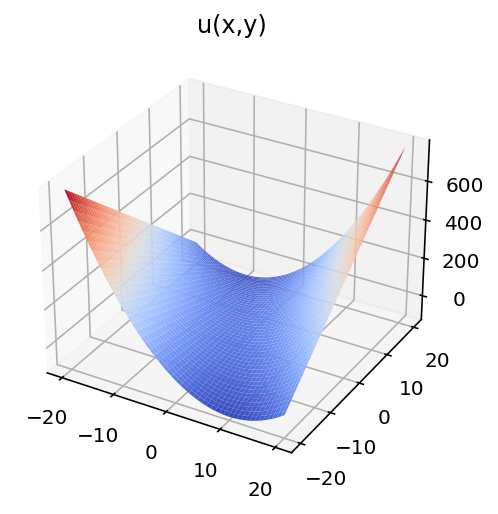

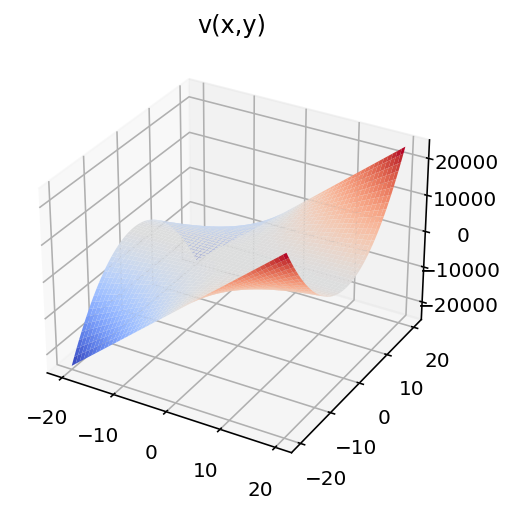

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

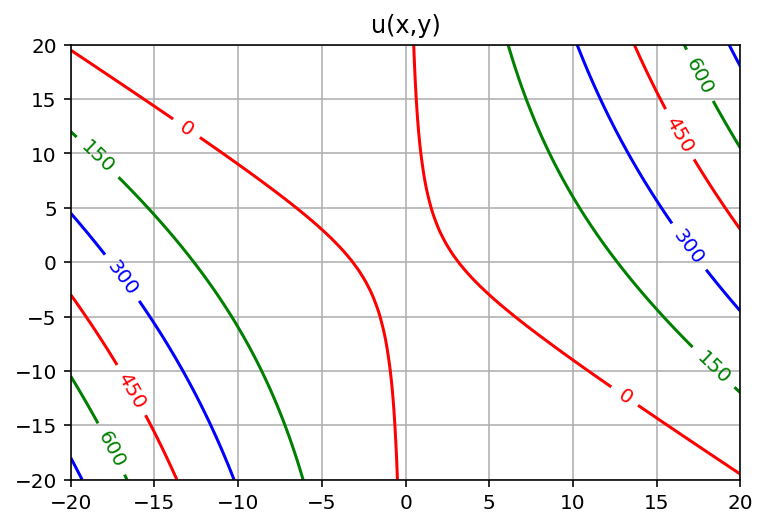

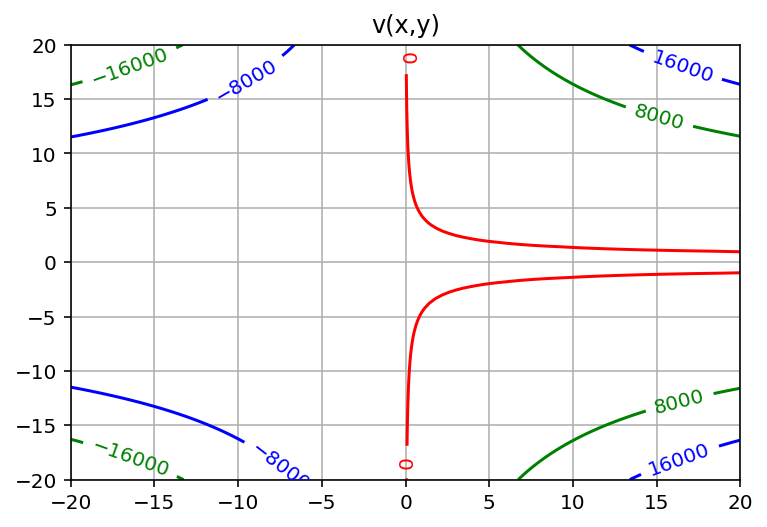

In [6]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

4)Let's overlay them on top of each other.

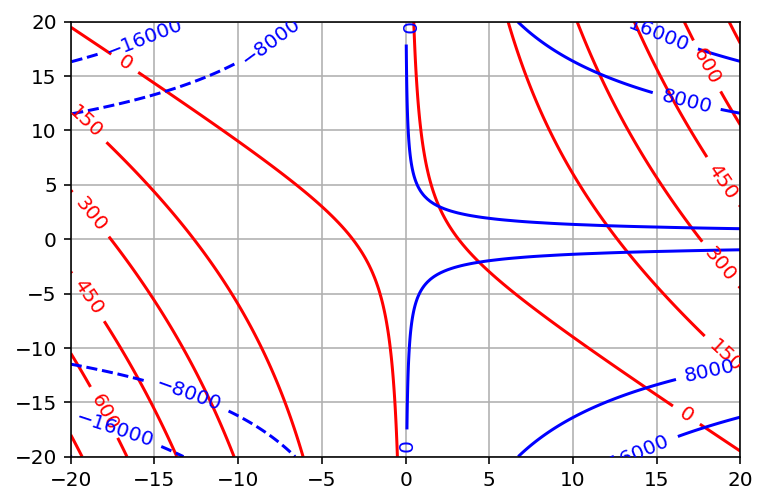

In [7]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

### Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

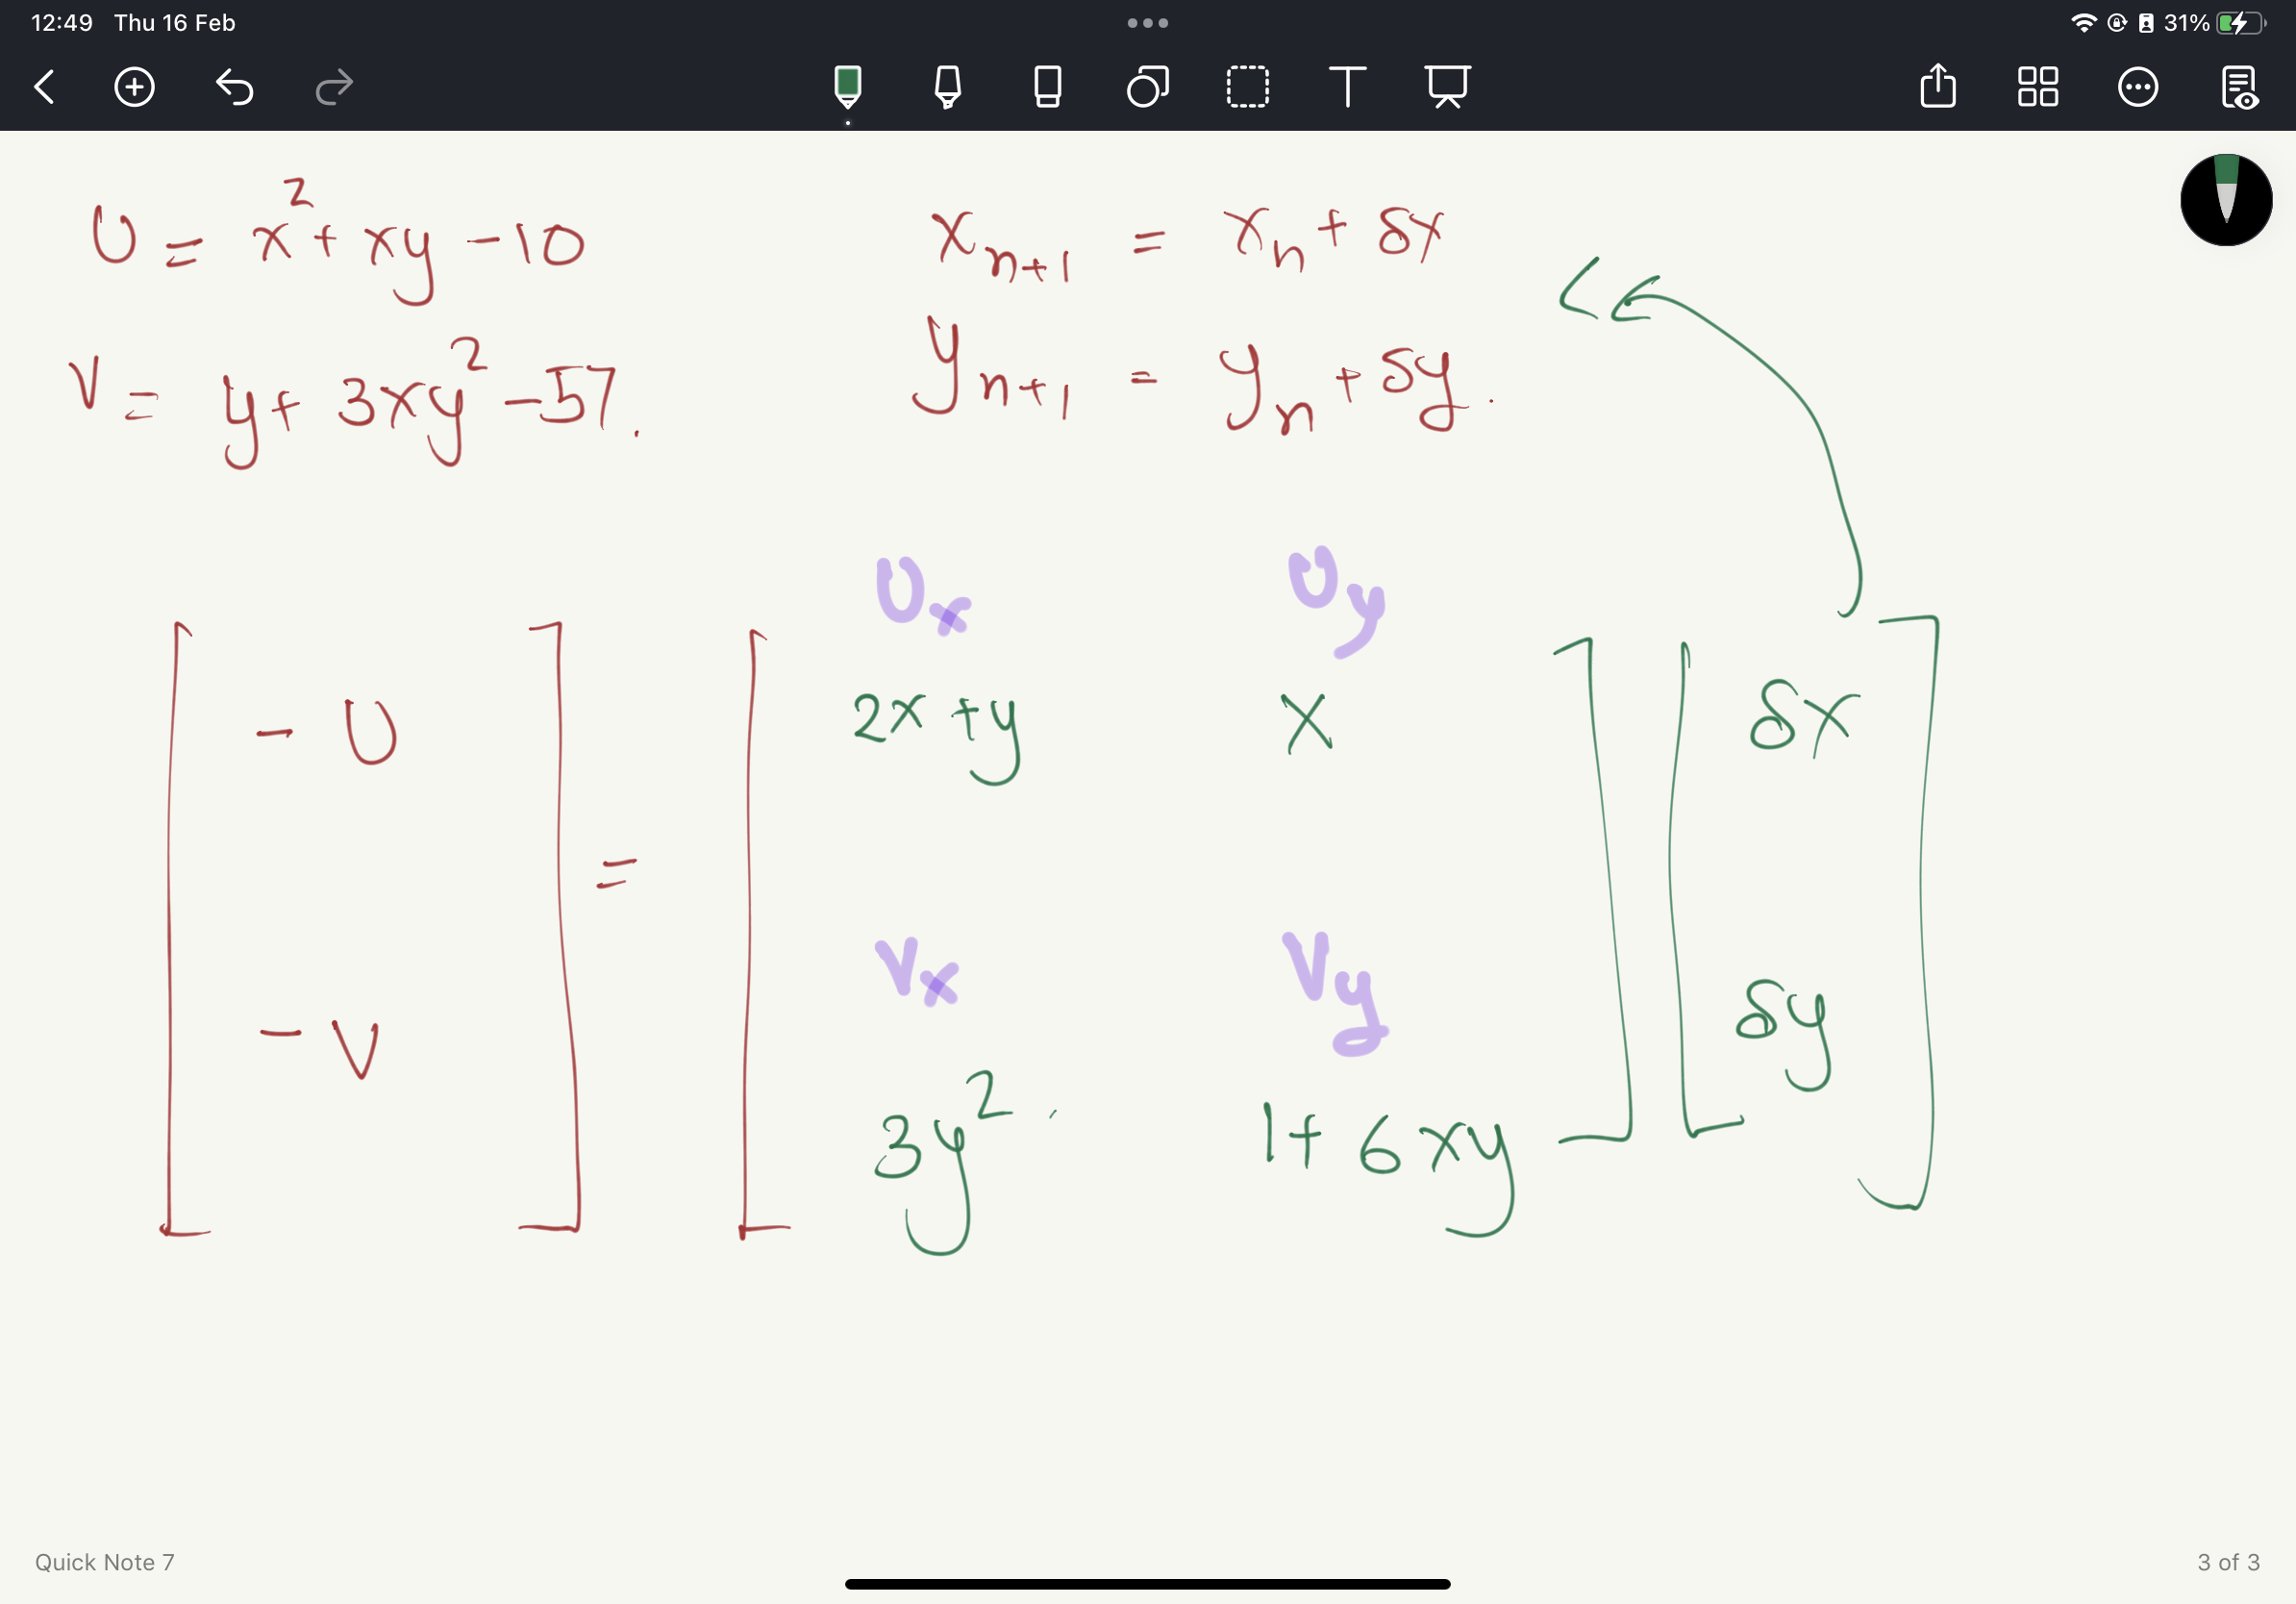

2)Where should you start your guess ($x_0, y_0$)?

3) Find ($x_1, y_1$)

In [17]:
def ux(x, y):
    return 2*x + y

def uy(x, y):
    return x

def vx(x, y):
    return 3*y**2

def vy(x, y):
    return 1 + 6*x*y

def solve(x0, y0, n):
    x, y = x0, y0
    for i in range(n):
        jacobian = np.array([
            [ux(x, y), uy(x, y)],
            [vx(x, y), vy(x, y)]
        ])
        b = np.array([-u(x,y), -v(x,y)])
        dx, dy = np.linalg.solve(jacobian, b)
        print(jacobian)
        x += dx
        y += dy
    return x, y

solve(1,2.,10)

[[ 4.  1.]
 [12. 13.]]
[[ 8.6   2.2 ]
 [52.92 56.44]]
[[ 7.21270165  1.95525152]
 [32.71354703 39.73977309]]
[[ 7.00173301  1.99548514]
 [27.19407682 37.04759377]]
[[ 6.99999087  1.99999668]
 [26.99995501 36.99991031]]
[[ 7.  2.]
 [27. 37.]]
[[ 7.  2.]
 [27. 37.]]
[[ 7.  2.]
 [27. 37.]]
[[ 7.  2.]
 [27. 37.]]
[[ 7.  2.]
 [27. 37.]]


(1.9999999999999998, 3.0000000000000004)

4)Find ($x_2, y_2$)

5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just add plt.plot([x],[y])). You may use np.linalg.solve.

In [14]:
a = np.array([
    [2., 3.],
    [1., 1.3]
])

b = np.array([
    5, 10.
])

x = np.linalg.solve(a, b)
print(x)
# this solve ax = b
print( a@x, b)

[ 58.75 -37.5 ]
[ 5. 10.] [ 5. 10.]


6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.